In [ ]:
# Food Fraud Detection Project 
# Implementation of anomaly detection technique using autoencoder
# Dataset: Spinach Adulterated Pistachios (https://www.kaggle.com/datasets/kazimkili/spinach-adulterated-pistachios)

# Work done by:
# Name: Chaari Mahmoud
# Class: IGL4

# Name: Ben Daya Aroua
# Class: IGL4


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

#Size of our input images
SIZE = 128

#############################################################################
#Define generators for training, validation and also anomaly data.

batch_size = 4
datagen = ImageDataGenerator(rescale=1./255)



In [5]:
train_generator = datagen.flow_from_directory(
    '/home/hamoud/Downloads/archive (1)/train',
    
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )



Found 159 images belonging to 1 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    '/home/hamoud/Downloads/archive (1)/validation/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

Found 42 images belonging to 1 classes.


In [7]:
anomaly_generator = datagen.flow_from_directory(
    '/home/hamoud/Downloads/archive (1)/anomaly/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

Found 504 images belonging to 1 classes.


In [9]:
#Define the autoencoder. 
#Try to make the bottleneck layer size as small as possible to make it easy for
#density calculations and also picking appropriate thresholds. 



#Encoder
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder

model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 4)        │           292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 4)        │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 8)        │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_9 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 3)    │         3,45

 Total params: 203,979 (796.79 KB)

 Trainable params: 203,979 (796.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Fit the model. 
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        shuffle = True)

Epoch 1/10


/home/hamoud/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1716637964.202312   37398 service.cc:145] XLA service 0x7f19f0016450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716637964.202333   37398 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce MX130, Compute Capability 5.0
2024-05-25 12:52:44.456068: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-25 12:52:44.863253: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 1/40 ━━━━━━━━━━━━━━━━━━━━ 11:35 18s/step - loss: 0.0714 - mse: 0.0714

I0000 00:00:1716637978.822024   37398 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 534ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0031

In [12]:
# Save the model as an H5 file
model.save('/home/hamoud/Downloads/archive (1)/model.keras')

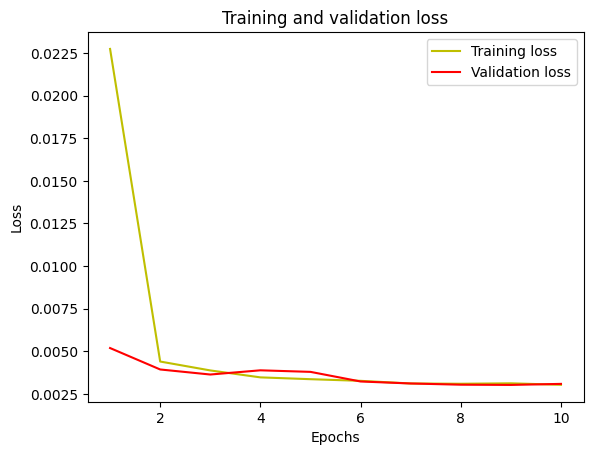

In [11]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
for i in range(len(train_generator)):
    data = train_generator[i]  # Get the next batch
    data_batch.append(data[0])


predicted = model.predict(data_batch[0])  #Predict on the first batch of images


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


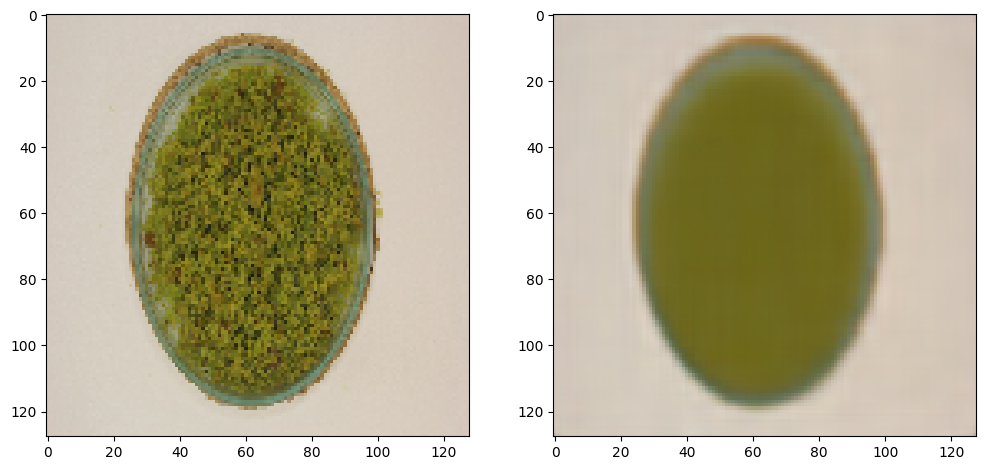

In [14]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

In [15]:
#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate(validation_generator)
anomaly_error = model.evaluate(anomaly_generator)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0031 - mse: 0.0031
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - loss: 0.0040 - mse: 0.0040
Recon. error for the validation (normal) data is:  [0.003092504572123289, 0.003092504572123289]
Recon. error for the anomaly data is:  [0.003975693602114916, 0.0039756931364536285]


In [16]:
#Let us extract (or build) the encoder network, with trained weights.
#This is used to get the compressed output (latent space) of the input image. 
#The compressed output is then used to calculate the KDE


# Build the encoder model
encoder_model = Sequential()

# Add the Conv2D layer without weights
encoder_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
# Set the weights for the first Conv2D layer
encoder_model.layers[0].set_weights(model.layers[0].get_weights())

# Add the MaxPooling2D layer
encoder_model.add(MaxPooling2D((2, 2), padding='same'))

# Add the Conv2D layer without weights
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Set the weights for the second Conv2D layer
encoder_model.layers[2].set_weights(model.layers[2].get_weights())

# Add the MaxPooling2D layer
encoder_model.add(MaxPooling2D((2, 2), padding='same'))

# Add the Conv2D layer without weights
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Set the weights for the third Conv2D layer
encoder_model.layers[4].set_weights(model.layers[4].get_weights())

# Add the MaxPooling2D layer
encoder_model.add(MaxPooling2D((2, 2), padding='same'))

# Add the Conv2D layer without weights (16 filters)
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
# Set the weights for the fourth Conv2D layer
encoder_model.layers[6].set_weights(model.layers[6].get_weights())

# Add the MaxPooling2D layer
encoder_model.add(MaxPooling2D((2, 2), padding='same'))

# Add the Conv2D layer without weights (8 filters)
encoder_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# Set the weights for the fifth Conv2D layer
encoder_model.layers[8].set_weights(model.layers[8].get_weights())

# Add the MaxPooling2D layer
encoder_model.add(MaxPooling2D((2, 2), padding='same'))

# Add the Conv2D layer without weights (4 filters)
encoder_model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
# Set the weights for the sixth Conv2D layer
encoder_model.layers[10].set_weights(model.layers[10].get_weights())

# Summary of the encoder model
encoder_model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 4)        │           292 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,916 (398.11 KB)

 Trainable params: 101,916 (398.11 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

# Get encoded output of input images = Latent space
encoded_images = encoder_model.predict(train_generator)

# Flatten the encoder output because KDE from sklearn takes 1D vectors as input
encoder_output_shape = encoder_model.output_shape  # Here, we have 16x16x16
out_vector_shape = encoder_output_shape[1] * encoder_output_shape[2] * encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [18]:
#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)


In [19]:
def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
        
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error


In [20]:
# Get a batch of images for each uninfected (normal) and anomaly (parasitized) images
train_batch = next(train_generator)
anomaly_batch  = next(anomaly_generator)

# Extract images from the batch
train_images = train_batch[0]
anomaly_images = anomaly_batch[0]

# Calculate density and reconstruction error for uninfected (normal) and anomaly (parasitized) images
uninfected_values = calc_density_and_recon_error(train_images)
anomaly_values = calc_density_and_recon_error(anomaly_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - loss: 0.0031 - mse: 0.0031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032 - mse: 0.0032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032 - mse: 0.0032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037 - mse: 0.0037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038 - mse: 0.0038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034 - mse: 0.0034


In [21]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    density_threshold = 250
    reconstruction_error_threshold = 0.001 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.Resampling.LANCZOS))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]]) 
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is pure")
        
    else:
        print("The image is NOT pure")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034 - mse: 0.0034
The image is pure
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029 - mse: 0.0029
The image is pure


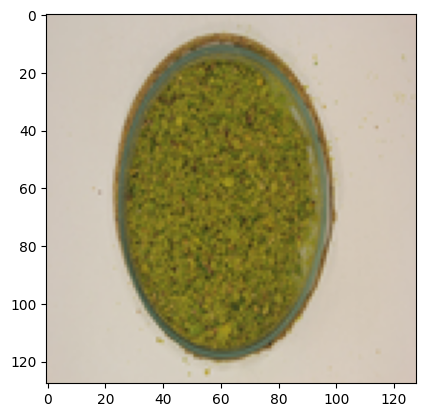

In [28]:
import glob
import random
import os

# Anomaly image verification
para_file_paths = [path for path in glob.glob('/home/hamoud/Desktop/anomaly/*') if os.path.isfile(path)]
if para_file_paths:
    num = random.randint(0, len(para_file_paths) - 1)
    check_anomaly(para_file_paths[num])

# Good/normal image verification
uninfected_file_paths = [path for path in glob.glob('/home/hamoud/Desktop/pure/*') if os.path.isfile(path)]
if uninfected_file_paths:
    num = random.randint(0, len(uninfected_file_paths) - 1)
    check_anomaly(uninfected_file_paths[num])


In [ ]:
reconstructions = model.predict(train_generator)

train_loss = tf.keras.losses.mae(reconstructions, train_generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step


In [ ]:
import numpy as np
reconstructions = model.predict(validation_generator) 
test_loss = tf.keras.losses.mae (reconstructions, validation_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step  


In [ ]:
a = pd.get_dummies(y_test)

In [ ]:
def predict(model, data, threshold):

reconstructions = model(data)

loss = tf.keras.losses.mae(reconstructions, data)

return tf.math.less (loss, threshold)

def print_stats (predictions, labels):

print("Matrice de confusion = {}".format(confusion_matrix(labels, predictions)))

print("Justesse = {}".format(accuracy_score(labels, predictions)))

print("Precision = {}".format(precision_score(labels, predictions)))

print("Rappel = {}".format(recall_score (labels, predictions)))

print("f_measure = {}".format(f1_score(labels, predictions)))